In [103]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import yfinance as yf
import vectorbt as vbt
from datetime import datetime

In [104]:
start_date = datetime(2015, 10, 1)
end_date = datetime(2021, 12, 1)
#end_date = datetime(2022, 2, 28)

In [105]:
data = pd.DataFrame()
data = data.ta.ticker('spy', start=start_date, end=end_date)
#data = data.ta.ticker('BTC-USD', start=start_date, end=end_date)

In [106]:
df = data.copy()

In [107]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-09-30,169.561311,170.861730,168.732973,170.683594,163452000,0.0,0
2015-10-01,171.084338,171.449526,169.071377,171.128876,131079000,0.0,0
2015-10-02,169.026874,173.711916,168.447915,173.685196,211003300,0.0,0
2015-10-05,174.985651,177.016431,174.869856,176.775940,126320800,0.0,0
2015-10-06,176.633391,177.230154,175.466585,176.170227,110274500,0.0,0


In [108]:
df = data.copy()
df['signal'] = df.ta.ema(5, append=True) > df.ta.ema(10, append=True)
#df['signal'] = df.ta.ema(5) > df.ta.ema(10, append=True)
#df['signal'] = df.ta.ema(5, append=True) > df.ta.ema(10)
#df['signal'] = df.ta.ema(5) > df.ta.ema(10)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_5,EMA_10,signal
Date,,,,,,,,,,
2015-09-30,169.561311,170.861730,168.732973,170.683594,163452000,0.0,0,NaN,NaN,False
2015-10-01,171.084338,171.449526,169.071377,171.128876,131079000,0.0,0,NaN,NaN,False
2015-10-02,169.026874,173.711916,168.447915,173.685196,211003300,0.0,0,NaN,NaN,False
2015-10-05,174.985651,177.016431,174.869856,176.775940,126320800,0.0,0,NaN,NaN,False
2015-10-06,176.633391,177.230154,175.466585,176.170227,110274500,0.0,0,173.688766,NaN,False
...,...,...,...,...,...,...,...,...,...,...
2021-11-23,465.584298,467.457721,462.824007,466.550903,73206500,0.0,0,466.548368,465.727207,True
2021-11-24,464.428337,467.926059,463.561388,467.796509,61858800,0.0,0,466.964415,466.103444,True
2021-11-26,460.721387,462.275923,456.167379,457.363190,112669600,0.0,0,463.764007,464.514307,False


In [109]:
df = data.copy()
df.ta.macd(append=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9'],
      dtype='object')

In [110]:
df['signal'] = df.MACD_12_26_9 > df.MACDs_12_26_9
#df['signal'] = df.MACD_12_26_9 > 0
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,signal
Date,,,,,,,,,,,
2015-09-30,169.561311,170.861730,168.732973,170.683594,163452000,0.0,0,NaN,NaN,NaN,False
2015-10-01,171.084338,171.449526,169.071377,171.128876,131079000,0.0,0,NaN,NaN,NaN,False
2015-10-02,169.026874,173.711916,168.447915,173.685196,211003300,0.0,0,NaN,NaN,NaN,False
2015-10-05,174.985651,177.016431,174.869856,176.775940,126320800,0.0,0,NaN,NaN,NaN,False
2015-10-06,176.633391,177.230154,175.466585,176.170227,110274500,0.0,0,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,465.584298,467.457721,462.824007,466.550903,73206500,0.0,0,4.968235,-0.589890,5.558124,False
2021-11-24,464.428337,467.926059,463.561388,467.796509,61858800,0.0,0,4.809917,-0.598566,5.408483,False
2021-11-26,460.721387,462.275923,456.167379,457.363190,112669600,0.0,0,3.798778,-1.287764,5.086542,False


In [111]:
signal_vectorbt = df.ta.tsignals(df.signal, asbool=True, append=True)
signal_vectorbt


,TS_Trends,TS_Trades,TS_Entries,TS_Exits
Date,,,,
2015-09-30,False,0,False,False
2015-10-01,False,0,False,False
2015-10-02,False,0,False,False
2015-10-05,False,0,False,False
2015-10-06,False,0,False,False
...,...,...,...,...
2021-11-23,False,0,False,False
2021-11-24,False,0,False,False
2021-11-26,False,0,False,False


In [112]:
signal_vectorbt.loc[signal_vectorbt.TS_Entries==True]

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
Date,,,,
2015-12-28,True,1,True,False
2016-01-28,True,1,True,False
2016-02-16,True,1,True,False
2016-03-29,True,1,True,False
2016-04-18,True,1,True,False
...,...,...,...,...
2021-08-06,True,1,True,False
2021-08-11,True,1,True,False
2021-08-25,True,1,True,False


In [113]:
port = vbt.Portfolio.from_signals(df.Close,
                                  entries=signal_vectorbt.TS_Entries,
                                  exits=signal_vectorbt.TS_Exits,
                                  freq="D",
                                  init_cash=100000,
                                  fees=0.0025,
                                  slippage=0.0025)

In [114]:
port.plot().show()

In [115]:
port.stats()

Start                         2015-09-30 00:00:00
End                           2021-11-30 00:00:00
Period                         1554 days 00:00:00
Start Value                              100000.0
End Value                            97136.881958
Total Return [%]                        -2.863118
Benchmark Return [%]                   165.968807
Max Gross Exposure [%]                      100.0
Total Fees Paid                       30760.07807
Max Drawdown [%]                        21.467269
Max Drawdown Duration           593 days 00:00:00
Total Trades                                   64
Total Closed Trades                            64
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                 37.5
Best Trade [%]                          10.309139
Worst Trade [%]                          -4.79655
Avg Winning Trade [%]                    2.861837
Avg Losing Trade [%]                    -1.728675


<AxesSubplot:xlabel='Date'>

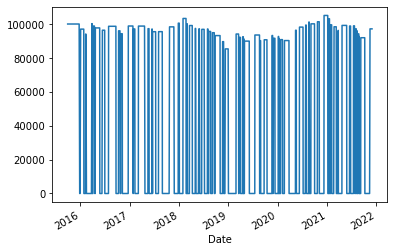

In [116]:
port.cash().plot()

<AxesSubplot:ylabel='Frequency'>

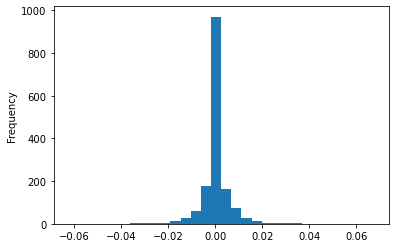

In [117]:
port.daily_returns().plot(kind='hist', bins=30)

Date
2015-09-30    0.0
2015-10-01    0.0
2015-10-02    0.0
2015-10-05    0.0
2015-10-06    0.0
             ... 
2021-11-23    0.0
2021-11-24    0.0
2021-11-26    0.0
2021-11-29    0.0
2021-11-30    0.0
Length: 1554, dtype: float64

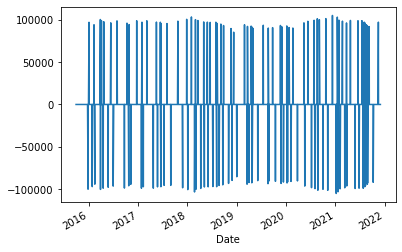

In [119]:
port.cash_flow().plot()
port.cash_flow()

In [120]:
a = pd.DataFrame(port.cash_flow(), index=df.index, columns=['cash_flow'])
a

,cash_flow
Date,
2015-09-30,0.0
2015-10-01,0.0
2015-10-02,0.0
2015-10-05,0.0
2015-10-06,0.0
...,...
2021-11-23,0.0
2021-11-24,0.0
2021-11-26,0.0


In [121]:
b = a.loc[a.cash_flow != 0]
b

,cash_flow
Date,
2015-12-28,-100000.000000
2016-01-04,96983.473300
2016-01-28,-96983.473300
2016-02-10,94068.772888
2016-02-16,-94068.772888
...,...
2021-08-26,92694.209856
2021-08-27,-92694.209856
2021-09-08,91906.407020


In [122]:
b['shift'] = b.cash_flow.shift(1)
b

C:\Users\gunsr\AppData\Local\Temp\ipykernel_13820\1769297385.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cash_flow,shift
Date,,
2015-12-28,-100000.000000,NaN
2016-01-04,96983.473300,-100000.000000
2016-01-28,-96983.473300,96983.473300
2016-02-10,94068.772888,-96983.473300
2016-02-16,-94068.772888,94068.772888
...,...,...
2021-08-26,92694.209856,-94181.771208
2021-08-27,-92694.209856,92694.209856
2021-09-08,91906.407020,-92694.209856


In [123]:
b = b.reset_index()
b

,Date,cash_flow,shift
0,2015-12-28,-100000.000000,NaN
1,2016-01-04,96983.473300,-100000.000000
2,2016-01-28,-96983.473300,96983.473300
3,2016-02-10,94068.772888,-96983.473300
4,2016-02-16,-94068.772888,94068.772888
...,...,...,...
123,2021-08-26,92694.209856,-94181.771208
124,2021-08-27,-92694.209856,92694.209856
125,2021-09-08,91906.407020,-92694.209856
126,2021-10-08,-91906.407020,91906.407020


In [124]:
b['profit'] = b['cash_flow'] + b['shift']
b

,Date,cash_flow,shift,profit
0,2015-12-28,-100000.000000,NaN,NaN
1,2016-01-04,96983.473300,-100000.000000,-3016.526700
2,2016-01-28,-96983.473300,96983.473300,0.000000
3,2016-02-10,94068.772888,-96983.473300,-2914.700412
4,2016-02-16,-94068.772888,94068.772888,0.000000
...,...,...,...,...
123,2021-08-26,92694.209856,-94181.771208,-1487.561352
124,2021-08-27,-92694.209856,92694.209856,0.000000
125,2021-09-08,91906.407020,-92694.209856,-787.802836
126,2021-10-08,-91906.407020,91906.407020,0.000000


In [127]:
tradelog = b.iloc[1::2]
tradelog

,Date,cash_flow,shift,profit
1,2016-01-04,96983.473300,-100000.000000,-3016.526700
3,2016-02-10,94068.772888,-96983.473300,-2914.700412
5,2016-03-28,100252.536548,-94068.772888,6183.763659
7,2016-04-05,98805.015451,-100252.536548,-1447.521097
9,2016-04-22,97695.660367,-98805.015451,-1109.355084
...,...,...,...,...
119,2021-08-09,96124.693104,-97169.821972,-1045.128868
121,2021-08-18,94181.771208,-96124.693104,-1942.921896
123,2021-08-26,92694.209856,-94181.771208,-1487.561352
125,2021-09-08,91906.407020,-92694.209856,-787.802836


<AxesSubplot:>

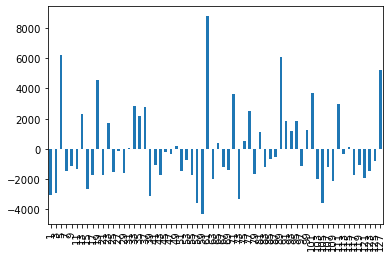

In [129]:
tradelog.profit.plot(kind='bar')